In [2]:
import pandas as pd
import numpy as np
import folium
import geopandas as gpd
import datetime as dt

In [3]:
nna = pd.read_csv("./Data/Primera_Infancia_30062021_coord_sisbénIV_052021.txt", sep="|", low_memory=False)
uds =  pd.read_excel("./Data/uds_agosto2021estadogeo1.xlsx", sheet_name="uds_agosto2021estadogeo1")

In [7]:
print(uds["estadogeo"].value_counts())
print("-----------------------------------------")
uds1 = uds.loc[(uds["estadogeo"]=="georeferenciada agosto 31") | (uds["estadogeo"]=="LIMITE MUNICIPAL")].copy()
print(uds1["estadogeo"].value_counts())

georeferenciada agosto 31    69910
LIMITE MUNICIPAL               418
FUERA DE MUNICIPIO             228
GEOREFERENCIADO MAYO 15        145
GEOREFERENCIADA DIC 18          79
ORDEN PÚBLICO                   77
FUERA DEL PAIS                  30
No reporta coordenadas          25
GEOREFERENCIADO ABRIL 27        17
SIN SEÑAL GPS                   14
GEOREFERENCIADA ABRIL30         11
RESGUARDO                        7
Name: estadogeo, dtype: int64
-----------------------------------------
georeferenciada agosto 31    69910
LIMITE MUNICIPAL               418
Name: estadogeo, dtype: int64


In [8]:
# UDS Duplicadas
print("UDS Duplicadas")
uds1["Duplicadas"] = uds1.duplicated(subset="CodigoUnid", keep=False)
print(uds1["Duplicadas"].value_counts())

UDS Duplicadas
False    66234
True      4094
Name: Duplicadas, dtype: int64


In [9]:
duplicados = uds1.query("Duplicadas==True").copy()
duplicados.sort_values(by="CodigoUnid", inplace=True)
duplicados.reset_index(inplace=True)
# 
print(duplicados["CodigoUn_1"][0])
print(duplicados["CodigoUn_1"][1])
print(duplicados["CodigoUn_1"][2])
print(duplicados["CodigoUn_1"][3])
# 
duplicados.head(6)

50011115887.0
50011115887.0
50011116512.0
50011116512.0


,index,OBJECTID_12,CodigoDepa,Departamen,CodigoMuni,MunicipioU,CodigoUnid,UnidadServ,NombreServ,EstadoUDS,...,CODDEP,DEP_12,CODMUN,MUNICIPI_2,area_km,estadogeo,OID_,CodigoUn_1,Cnt_Codigo,Duplicadas
0,2376,2377,5,Antioquia,5001,Medellin,50011115887,MI PEQUEÑO PONY,HCB INTEGRAL - COMUNITARIO INTEGRAL,ACTIVA,...,5.0,ANTIOQUIA,5001.0,MEDELLÍN,0,georeferenciada agosto 31,1852,5.001112e+10,1,True
1,3009,3010,5,Antioquia,5001,Medellin,50011115887,MI PEQUEÑO PONY,HCB - COMUNITARIO,ACTIVA,...,5.0,ANTIOQUIA,5001.0,MEDELLÍN,0,georeferenciada agosto 31,1852,5.001112e+10,1,True
2,2110,2111,5,Antioquia,5001,Medellin,50011116512,LA LOMITA,HCB - COMUNITARIO,ACTIVA,...,5.0,ANTIOQUIA,5001.0,MEDELLÍN,0,georeferenciada agosto 31,1858,5.001112e+10,1,True
3,1225,1220,5,Antioquia,5001,Medellin,50011116512,LA LOMITA,HCB INTEGRAL - COMUNITARIO INTEGRAL,ACTIVA,...,5.0,ANTIOQUIA,5001.0,MEDELLÍN,0,georeferenciada agosto 31,1858,5.001112e+10,1,True
4,2730,2731,5,Antioquia,5001,Medellin,50011116581,CARITAS ALEGRES,HCB INTEGRAL - COMUNITARIO INTEGRAL,ACTIVA,...,5.0,ANTIOQUIA,5001.0,MEDELLÍN,0,georeferenciada agosto 31,1862,5.001112e+10,1,True
5,2253,2254,5,Antioquia,5001,Medellin,50011116581,CARITAS ALEGRES,HCB - COMUNITARIO,ACTIVA,...,5.0,ANTIOQUIA,5001.0,MEDELLÍN,0,georeferenciada agosto 31,1862,5.001112e+10,1,True


In [10]:
uds1["Duplicadas"] = uds1.duplicated(subset="CodigoUnid", keep='first')
uds1 = uds1.query("Duplicadas==False").copy()
uds1.sort_values(by="CodigoUnid", inplace=True)
uds1.reset_index(inplace=True)
len(uds1)

68281

## Unión Bases

In [11]:
df = nna.merge(uds1, left_on='CodigoUnidadServicio', right_on='CodigoUnid', how="left")

In [12]:
"Base inicial NNA {}, cruce con UDS {}, Diferencia {}".format(len(nna),len(df),len(nna)-len(df))

'Base inicial NNA 949577, cruce con UDS 949577, Diferencia 0'

In [13]:
print("NNA que no cruzan con base UDS")
df.CodigoUnid.isna().sum()

NNA que no cruzan con base UDS


8381

In [14]:
# Municipios y Departamentos de NNA que no Cruzan con Base UDS
df.loc[df.CodigoUnid.isna()].MunicipioUDS.value_counts().reset_index()

,index,MunicipioUDS
0,Hacari,373
1,La Playa,366
2,Jamundi,343
3,"Bogota, D.C.",274
4,Cucuta,226
...,...,...
223,Paez,1
224,Valledupar,1
225,Zona Bananera,1
226,Manizales,1


In [15]:
df.loc[df.CodigoUnid.isna()].DepartamentoUDS.value_counts().reset_index()

,index,DepartamentoUDS
0,Norte De Santander,1525
1,Valle Del Cauca,866
2,Córdoba,694
3,Chocó,611
4,Antioquia,549
5,La Guajira,454
6,Magdalena,400
7,Santander,389
8,Meta,383
9,Sucre,352


In [16]:
df['LATITUD_NNA'] = df['Coord_x_auto_enc'].str.replace(',', '.').astype('float')
df['LONGITUD_NNA'] = df['Coord_y_auto_enc'].str.replace(',', '.').astype('float')

In [17]:
df.LONGITUD_NNA = df.LONGITUD_NNA.apply(lambda x: x*10 if x < 1.0 and x > -1.0 else x)

Longitud y Latitud Corregida

In [20]:
LONGITUD_NNA_2 = np.where(df['LONGITUD_NNA'].between(-81.8, -60.0), df['LONGITUD_NNA'], df['LATITUD_NNA'])
LATITUD_NNA_2 = np.where(df['LATITUD_NNA'].between(-20.0, 15.0), df['LATITUD_NNA'], 
                         np.where(df['LONGITUD_NNA'].between(-20.0, 15.0), df['LONGITUD_NNA'],
                                  df['LATITUD_NNA']))

LONGITUD_NNA_2 = pd.DataFrame(LONGITUD_NNA_2)
LATITUD_NNA_2 = pd.DataFrame(LATITUD_NNA_2)

df['LONGITUD_NNA_2'] = LONGITUD_NNA_2[0]
df['LATITUD_NNA_2'] = LATITUD_NNA_2[0]

df['LONGITUD_NNA_2'] = df['LONGITUD_NNA_2'].apply(lambda x: x if x<0 else -x)

### Función de Distancias

In [13]:
def calculo_distancia(df, lat1,lon1,lat2,lon2):
    #Cálculo de distancia harvesiana
    lat1=df[lat1].astype(float)
    long1=df[lon1].astype(float)

    lat2=df[lat2].astype(float)
    long2=df[lon2].astype(float)
    long1, lat1, long2, lat2 = map(np.radians, [long1, lat1, long2, lat2])
    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    earth_radius = 6367
    d = earth_radius * c
    return df.assign(Distancia = lambda x : d)

In [23]:
df = calculo_distancia(df,'LATITUD','LONGITUD','LATITUD_NNA_2','LONGITUD_NNA_2')

In [24]:
df['pct_rank'] = df['Distancia'].rank(pct=True)
df.sort_values(by="Distancia",ascending=False)[['LATITUD', 'LONGITUD','LATITUD_NNA','LONGITUD_NNA','LATITUD_NNA_2','LONGITUD_NNA_2','Distancia','pct_rank']]

,LATITUD,LONGITUD,LATITUD_NNA,LONGITUD_NNA,LATITUD_NNA_2,LONGITUD_NNA_2,Distancia,pct_rank
520250,4.788306,-71.343083,50.849810,4.341914,4.341914,-50.849810,2270.551000,1.000000
734883,4.788306,-71.343083,50.849857,4.341837,4.341837,-50.849857,2270.546103,0.999998
925827,4.788306,-71.343083,50.849857,4.341837,4.341837,-50.849857,2270.546103,0.999998
329846,4.788306,-71.343083,50.849857,4.341837,4.341837,-50.849857,2270.546103,0.999998
905588,4.791222,-71.332639,50.849810,4.341914,4.341914,-50.849810,2269.396812,0.999996
...,...,...,...,...,...,...,...,...
948874,NaN,NaN,7.148232,-73.133390,7.148232,-73.133390,NaN,NaN
949003,NaN,NaN,7.508638,-73.560795,7.508638,-73.560795,NaN,NaN
949170,2.896158,-75.439700,NaN,NaN,NaN,NaN,NaN,NaN
949189,NaN,NaN,7.077567,-73.117439,7.077567,-73.117439,NaN,NaN


In [25]:
sz = df['Distancia'].size-1

In [26]:
df['pctile'] = df['Distancia'].rank(method='average').apply(lambda x: round(100.0*(x-1)/sz, 0))

<AxesSubplot:>

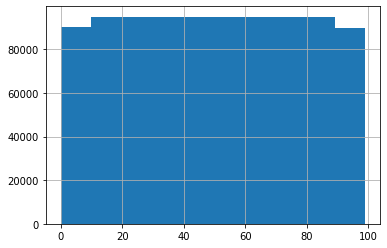

In [32]:

df.pctile.hist()

In [33]:
casos_2_lejanos = pd.DataFrame(df.sort_values(by=["Distancia"],ascending=False).head(2))
# 
m = folium.Map(location=[4.7110, -74.0721], zoom_start=5, tiles='CartoDB positron')
# 
for _, r in casos_2_lejanos.iterrows():
    folium.Marker(location=[r["LATITUD_NNA_2"],r["LONGITUD_NNA_2"]], popup='Beneficiario ID: {}'.format(r['idbeneficiario']), draggable=True).add_to(m)
    folium.Marker(location=[r["LATITUD"], r["LONGITUD"]], popup='Código UDS: {} <br> UDS: {}'.format(r['CodigoUnidadServicio'], r['UnidadServicio']), draggable=True).add_to(m)
    points = [[r["LATITUD_NNA_2"],r["LONGITUD_NNA_2"]],[r["LATITUD"], r["LONGITUD"]]]
    folium.PolyLine(points, color='red').add_to(m)
m

In [34]:
casos_2_lejanos[['CodigoDepartamentoUDS','CodigoMunicipioUDS','MunicipioUDS', 'CodigoDepartamentoResidenciaBeneficiario','CodigoMunicipioResidenciaBeneficiario','CodigoDepa','CodigoMuni','CODDEP','CODMUN','Coord_x_auto_enc','Coord_y_auto_enc','LATITUD_NNA_2', 'LONGITUD_NNA_2','LATITUD', 'LONGITUD','Distancia','pct_rank']]

,CodigoDepartamentoUDS,CodigoMunicipioUDS,MunicipioUDS,CodigoDepartamentoResidenciaBeneficiario,CodigoMunicipioResidenciaBeneficiario,CodigoDepa,CodigoMuni,CODDEP,CODMUN,Coord_x_auto_enc,Coord_y_auto_enc,LATITUD_NNA_2,LONGITUD_NNA_2,LATITUD,LONGITUD,Distancia,pct_rank
520250,85,85230,Orocue,85.0,85230.0,85.0,85230.0,85.0,85230.0,"50,84981030",",43419140",4.341914,-50.849810,4.788306,-71.343083,2270.551000,1.000000
734883,85,85230,Orocue,85.0,85230.0,85.0,85230.0,85.0,85230.0,"50,84985730",",43418370",4.341837,-50.849857,4.788306,-71.343083,2270.546103,0.999998


In [35]:
casos_2_cercanos = pd.DataFrame(df.sort_values(by=["Distancia"],ascending=True).head(2))
# 
m = folium.Map(location=[4.7110, -74.0721], zoom_start=5, tiles='CartoDB positron')
# 
# 
for _, r in casos_2_cercanos.iterrows():
    folium.Marker(location=[r["LATITUD_NNA_2"],r["LONGITUD_NNA_2"]], popup='Beneficiario ID: {}'.format(r['idbeneficiario']), draggable=True).add_to(m)
    folium.Marker(location=[r["LATITUD"], r["LONGITUD"]], popup='Código UDS: {} <br> UDS: {}'.format(r['CodigoUnidadServicio'], r['UnidadServicio']), draggable=True).add_to(m)
    points = [[r["LATITUD_NNA_2"],r["LONGITUD_NNA_2"]],[r["LATITUD"], r["LONGITUD"]]]
    folium.PolyLine(points, color='red').add_to(m)
# 
# 
m

In [36]:
casos_2_cercanos[['CodigoDepartamentoUDS','CodigoMunicipioUDS','MunicipioUDS', 'CodigoDepartamentoResidenciaBeneficiario','CodigoMunicipioResidenciaBeneficiario','CodigoDepa','CodigoMuni','CODDEP','CODMUN','Coord_x_auto_enc','Coord_y_auto_enc','LATITUD_NNA_2', 'LONGITUD_NNA_2','LATITUD', 'LONGITUD','Distancia','pct_rank','pctile']]

,CodigoDepartamentoUDS,CodigoMunicipioUDS,MunicipioUDS,CodigoDepartamentoResidenciaBeneficiario,CodigoMunicipioResidenciaBeneficiario,CodigoDepa,CodigoMuni,CODDEP,CODMUN,Coord_x_auto_enc,Coord_y_auto_enc,LATITUD_NNA_2,LONGITUD_NNA_2,LATITUD,LONGITUD,Distancia,pct_rank,pctile
603122,47,47189,Cienaga,47.0,47189.0,47.0,47189.0,47.0,47189.0,"10,99841787","-74,25231220",10.998418,-74.252312,10.998417,-74.252311,0.000179,0.000001,0.0
133711,23,23815,Tuchín,23.0,23815.0,23.0,23815.0,23.0,23815.0,"9,18527630","-75,55944351",9.185276,-75.559444,9.185278,-75.559444,0.000194,0.000002,0.0


# Revision Coordenadas en Municipio

In [37]:
df_final=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUD_NNA_2, df.LATITUD_NNA_2),crs="EPSG:4326").copy()
# 
# In \[ \]:
# 
#Carga geojson Municipios
begin = dt.datetime.now()
# 
Municipios_geo=gpd.read_file("./Data/Municipios_IC-1.geojson")
# 
Municipios_geo['MPIO_CCDGO']=Municipios_geo['MPIO_CCDGO'].apply(lambda x : str(x) if len(str(x))==5 else "0" + str(x))
Municipios_geo['DPTO_CCDGO']=Municipios_geo['DPTO_CCDGO'].apply(lambda x : str(x) if len(str(x))==2 else "0" + str(x))
# 
Municipios_geo = Municipios_geo[['MPIO_CCDGO','geometry']]
# 
print("Tiempo Cargue y Depuración:", dt.datetime.now() - begin)

Tiempo Cargue y Depuración: 0:00:26.197573


In [38]:
Municipios_geo.sort_values(by="MPIO_CCDGO")

,MPIO_CCDGO,geometry
289,05001,"MULTIPOLYGON (((-75.66974 6.37360, -75.66965 6..."
313,05002,"MULTIPOLYGON (((-75.46938 5.94575, -75.46897 5..."
312,05004,"MULTIPOLYGON (((-76.08351 6.75050, -76.08325 6..."
311,05021,"MULTIPOLYGON (((-75.03320 6.41586, -75.03313 6..."
310,05030,"MULTIPOLYGON (((-75.67587 6.08561, -75.67540 6..."
...,...,...
1111,97889,"MULTIPOLYGON (((-69.70210 1.10907, -69.70233 1..."
1112,99001,"MULTIPOLYGON (((-67.80972 6.32432, -67.80946 6..."
1113,99524,"MULTIPOLYGON (((-69.03359 6.21870, -69.03334 6..."
943,99624,"MULTIPOLYGON (((-70.65378 5.37298, -70.65327 5..."


In [39]:
df_final["CodigoMunicipioResidenciaBeneficiario"] = df_final.CodigoMunicipioResidenciaBeneficiario.astype(str)
df_final["CodigoMunicipioResidenciaBeneficiario"] = df_final.CodigoMunicipioResidenciaBeneficiario.str.split('.', expand = True)[0]
df_final["CodigoMunicipioResidenciaBeneficiario"] = df_final.CodigoMunicipioResidenciaBeneficiario.apply(lambda x: x if len(x)==5 else "0"+ x)
df_final["CodigoMunicipioResidenciaBeneficiario"].sort_values()

949576    05001
489746    05001
489704    05001
489672    05001
489671    05001
          ...  
619477    99773
721355    99773
369537    99773
78741     99773
761553    99773
Name: CodigoMunicipioResidenciaBeneficiario, Length: 949577, dtype: object

In [40]:
Municipios_geo.rename(columns={"geometry":"Poligono_Mun_NNA"}, inplace=True)
df_final = df_final.merge(Municipios_geo, how="left", left_on="CodigoMunicipioResidenciaBeneficiario", right_on="MPIO_CCDGO")
df_final["Coord_NNA_en_Mpio"]=~df_final.Poligono_Mun_NNA.contains(df_final['geometry'])

In [41]:
df_final.Coord_NNA_en_Mpio.value_counts()

False    868131
True      81446
Name: Coord_NNA_en_Mpio, dtype: int64

In [42]:
df_final['Coord_NNA_en_Mpio'] = np.where(df_final['Coord_NNA_en_Mpio']==False, "Si", "No")
print(len(df_final))
df_final = df_final.loc[df_final.pctile<99]
print(len(df_final))
df_final.Coord_NNA_en_Mpio.value_counts()

949577
935333


Si    861561
No     73772
Name: Coord_NNA_en_Mpio, dtype: int64

In [43]:
casos_medios = df_final.loc[df_final.pctile==50].head(1)
# 
m = folium.Map(location=[casos_medios["LATITUD_NNA_2"],casos_medios["LONGITUD_NNA_2"]], zoom_start=15, tiles='CartoDB positron')
# 
# 
for _, r in casos_medios.iterrows():
    folium.Marker(location=[r["LATITUD_NNA_2"],r["LONGITUD_NNA_2"]], popup='Beneficiario ID: {}'.format(r['idbeneficiario']), draggable=True).add_to(m)
    folium.Marker(location=[r["LATITUD"], r["LONGITUD"]], popup='Código UDS: {} <br> UDS: {}'.format(r['CodigoUnidadServicio'], r['UnidadServicio']), draggable=True).add_to(m)
    points = [[r["LATITUD_NNA_2"],r["LONGITUD_NNA_2"]],[r["LATITUD"], r["LONGITUD"]]]
    folium.PolyLine(points, color='red').add_to(m)
# 
# 
m

In [44]:
casos_medios[['CodigoDepartamentoUDS','CodigoMunicipioUDS','MunicipioUDS', 'CodigoDepartamentoResidenciaBeneficiario','CodigoMunicipioResidenciaBeneficiario','CodigoDepa','CodigoMuni','CODDEP','CODMUN','Coord_x_auto_enc','Coord_y_auto_enc','LATITUD_NNA_2', 'LONGITUD_NNA_2','LATITUD', 'LONGITUD','Distancia','pct_rank','pctile','Coord_NNA_en_Mpio']]


,CodigoDepartamentoUDS,CodigoMunicipioUDS,MunicipioUDS,CodigoDepartamentoResidenciaBeneficiario,CodigoMunicipioResidenciaBeneficiario,CodigoDepa,CodigoMuni,CODDEP,CODMUN,Coord_x_auto_enc,Coord_y_auto_enc,LATITUD_NNA_2,LONGITUD_NNA_2,LATITUD,LONGITUD,Distancia,pct_rank,pctile,Coord_NNA_en_Mpio
15,54,54673,San Cayetano,54.0,54261,54.0,54673.0,54.0,54673.0,"7,87687358","-72,54941311",7.876874,-72.549413,7.883889,-72.546667,0.836143,0.503212,50.0,No


In [45]:
casos_75pctile = df_final.loc[df_final.pctile==75].head(1)
# 
m = folium.Map(location=[casos_75pctile["LATITUD_NNA_2"],casos_75pctile["LONGITUD_NNA_2"]], zoom_start=15, tiles='CartoDB positron')
# 
# 
for _, r in casos_75pctile.iterrows():
    folium.Marker(location=[r["LATITUD_NNA_2"],r["LONGITUD_NNA_2"]], popup='Beneficiario ID: {}'.format(r['idbeneficiario']), draggable=True).add_to(m)
    folium.Marker(location=[r["LATITUD"], r["LONGITUD"]], popup='Código UDS: {} <br> UDS: {}'.format(r['CodigoUnidadServicio'], r['UnidadServicio']), draggable=True).add_to(m)
    points = [[r["LATITUD_NNA_2"],r["LONGITUD_NNA_2"]],[r["LATITUD"], r["LONGITUD"]]]
    folium.PolyLine(points, color='red').add_to(m)
# 
# 
m

In [46]:
casos_75pctile[['CodigoDepartamentoUDS','CodigoMunicipioUDS','MunicipioUDS', 'CodigoDepartamentoResidenciaBeneficiario','CodigoMunicipioResidenciaBeneficiario','CodigoDepa','CodigoMuni','CODDEP','CODMUN','Coord_x_auto_enc','Coord_y_auto_enc','LATITUD_NNA_2', 'LONGITUD_NNA_2','LATITUD', 'LONGITUD','Distancia','pct_rank','pctile','Coord_NNA_en_Mpio']]


,CodigoDepartamentoUDS,CodigoMunicipioUDS,MunicipioUDS,CodigoDepartamentoResidenciaBeneficiario,CodigoMunicipioResidenciaBeneficiario,CodigoDepa,CodigoMuni,CODDEP,CODMUN,Coord_x_auto_enc,Coord_y_auto_enc,LATITUD_NNA_2,LONGITUD_NNA_2,LATITUD,LONGITUD,Distancia,pct_rank,pctile,Coord_NNA_en_Mpio
66,73,73283,Fresno,73.0,73283,73.0,73283.0,73.0,73283.0,"5,18640276","-75,05497417",5.186403,-75.054974,5.211828,-75.045972,2.99585,0.754155,75.0,Si


In [48]:
base_final = df_final.drop(columns=["Poligono_Mun_NNA","geometry"])

In [49]:
base_final.to_csv("./Data/Ejercicio Distancias NNA vs UDS.csv", sep="|", index=False)


In [1]:
import pandas as pd
base_final = pd.read_csv("./Data/Ejercicio Distancias NNA vs UDS.csv", sep="|", low_memory=False)

In [10]:
base_final.columns

Index(['idbeneficiario', 'CodigoDepartamentoUDS', 'DepartamentoUDS',
       'CodigoMunicipioUDS', 'MunicipioUDS', 'ZonaUbicacionUDS',
       'CodigoUnidadServicio', 'UnidadServicio', 'NombreServicio',
       'CodigoDepartamentoResidenciaBeneficiario',
       'DepartamentoResidenciaBeneficiario',
       'CodigoMunicipioResidenciaBeneficiario',
       'MunicipioResidenciaBeneficiario', 'ZonaUbicacionBeneficiario',
       'Coord_x_auto_enc', 'Coord_y_auto_enc', 'index', 'OBJECTID_12',
       'CodigoDepa', 'Departamen', 'CodigoMuni', 'MunicipioU', 'CodigoUnid',
       'UnidadServ', 'NombreServ', 'EstadoUDS', 'LatitudUDS', 'Latitgra',
       'latmin', 'latseg', 'latposic', 'LongitudUD', 'longgra', 'longmin',
       'longseg', 'longposic', 'ConteoBene', 'LATITUD', 'LONGITUD',
       'OBJECTID_2', 'DPTO_CCDGO', 'MPIO_CCDGO_x', 'MPIO_CNMBR', 'MPIO_CCNCT',
       'MPIO_NANO', 'DPTO_CNMBR', 'codmun_num', 'CODDEP', 'DEP_12', 'CODMUN',
       'MUNICIPI_2', 'area_km', 'estadogeo', 'OID_', 'CodigoUn

In [5]:
base_final['Distancia_mts']= base_final['Distancia'] * 1000

In [13]:

resumen = base_final.groupby(['CodigoDepartamentoResidenciaBeneficiario','DepartamentoResidenciaBeneficiario','ZonaUbicacionBeneficiario','Coord_NNA_en_Mpio'])['Distancia_mts'].describe(percentiles=[.25, .5, .75,.9,.95]).reset_index()
resumen1 = base_final.groupby(['CodigoDepartamentoResidenciaBeneficiario','DepartamentoResidenciaBeneficiario','CodigoMunicipioResidenciaBeneficiario','MunicipioResidenciaBeneficiario','ZonaUbicacionBeneficiario','Coord_NNA_en_Mpio'])['Distancia_mts'].describe(percentiles=[.25, .5, .75,.9,.95]).reset_index()

In [14]:
resumen = resumen.round(2)
resumen1 = resumen1.round(2)

In [18]:
import xlsxwriter
writer = pd.ExcelWriter('./Data/Resumen Municipios Ejercicio Distancias NNA vs UDS.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
resumen.to_excel(writer, sheet_name='Depto')
resumen1.to_excel(writer, sheet_name='Mpio')
writer.save()



# Ejercicio Percentil 95 NNA vs UDS

In [2]:
import pandas as pd
base_final = pd.read_csv("./Data/Ejercicio Distancias NNA vs UDS.csv", sep="|", low_memory=False)
uds =  pd.read_excel("./Data/uds_agosto2021estadogeo1.xlsx", sheet_name="uds_agosto2021estadogeo1")

base_final['Distancia_mts']= base_final['Distancia'] * 1000

In [58]:
caso_95pctile = base_final.loc[(base_final.pctile==95) & (base_final.Coord_NNA_en_Mpio=="Si")].sort_values(by="Distancia")
caso_95pctile = caso_95pctile[['idbeneficiario','CodigoDepartamentoResidenciaBeneficiario','DepartamentoResidenciaBeneficiario','CodigoMunicipioResidenciaBeneficiario','MunicipioResidenciaBeneficiario','ZonaUbicacionBeneficiario','CodigoUnidadServicio','UnidadServicio','NombreServicio','LATITUD','LONGITUD','LATITUD_NNA_2','LONGITUD_NNA_2','Distancia_mts','pctile','Coord_NNA_en_Mpio']]
caso_95pctile = caso_95pctile.loc[caso_95pctile.MunicipioResidenciaBeneficiario=="Bogota, D.C."].head(1).reset_index()
uds['lat_2'] = caso_95pctile['LATITUD_NNA_2'][0]
uds['lon_2'] = caso_95pctile['LONGITUD_NNA_2'][0]
uds = calculo_distancia(uds,'LATITUD', 'LONGITUD','lat_2','lon_2')

uds_caso_95pctile = uds.loc[uds.Distancia < 10].sort_values(by="Distancia",ascending=True).copy()

,index,idbeneficiario,CodigoDepartamentoResidenciaBeneficiario,DepartamentoResidenciaBeneficiario,CodigoMunicipioResidenciaBeneficiario,MunicipioResidenciaBeneficiario,ZonaUbicacionBeneficiario,CodigoUnidadServicio,UnidadServicio,NombreServicio,LATITUD,LONGITUD,LATITUD_NNA_2,LONGITUD_NNA_2,Distancia_mts,pctile,Coord_NNA_en_Mpio
0,908710,20928088,11.0,Bogota D.C.,11001,"Bogota, D.C.",CABECERA,110011120955,LOS NIÑOS DEL FUTURO,HCB - COMUNITARIO,4.501944,-74.110278,4.183838,-74.21469,37194.707967,95.0,Si


In [91]:
import folium


m = folium.Map(location=[caso_95pctile["LATITUD_NNA_2"],caso_95pctile["LONGITUD_NNA_2"]], zoom_start=9, tiles='CartoDB positron') 
folium.Marker(location=[caso_95pctile["LATITUD_NNA_2"],caso_95pctile["LONGITUD_NNA_2"]], popup='Beneficiario ID: {}'.format(caso_95pctile['idbeneficiario'][0]), draggable=False, icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=[caso_95pctile["LATITUD"],caso_95pctile["LONGITUD"]], popup='Código Unidad Servicio Actual: {}, Unidad Servicio Actual: {}'.format(caso_95pctile['CodigoUnidadServicio'][0], caso_95pctile['UnidadServicio'][0]), draggable=False, icon=folium.Icon(color='green')).add_to(m)
points = [[caso_95pctile["LATITUD_NNA_2"][0],caso_95pctile["LONGITUD_NNA_2"][0]],[caso_95pctile["LATITUD"][0], caso_95pctile["LONGITUD"][0]]]
folium.PolyLine(points, color='red').add_to(m)

for _, r in uds_caso_95pctile.iterrows():
    folium.Marker(location=[r["LATITUD"], r["LONGITUD"]], popup='Código UDS: {} <br> UDS: {}'.format(r['CodigoUnid'], r['UnidadServ']), draggable=False).add_to(m)

m